In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Jaydeep/OneDrive/Desktop/tirth/Iris.csv")

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
df[df.columns[-1]], _ = pd.factorize(df[df.columns[-1]])

In [6]:
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


# 3D Scatter Plot

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

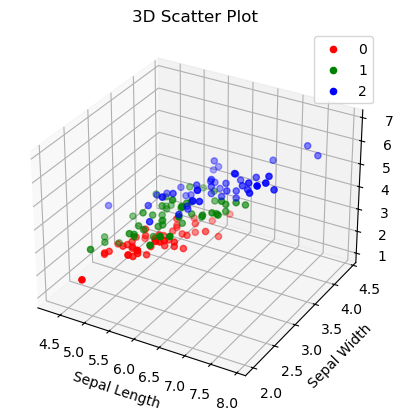

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

species = df['Species'].unique()
colors = ['r', 'g', 'b']
for spec, color in zip(species, colors):
    subset = df[df['Species'] == spec]
    ax.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], subset['PetalLengthCm'], c=color, label=spec)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot')
ax.legend()
plt.show()

# T-SNE Plot

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns

In [12]:
X = df.drop('Species', axis=1)
y = df['Species']

In [13]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

In [14]:
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Species'] = y

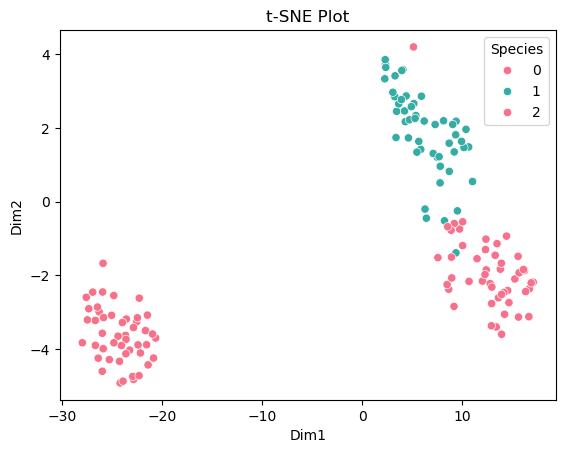

In [17]:
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Species', palette='husl')
plt.title('t-SNE Plot')
plt.show()

# Heatmap of Correlation Matrix

In [18]:
corr = df.corr()

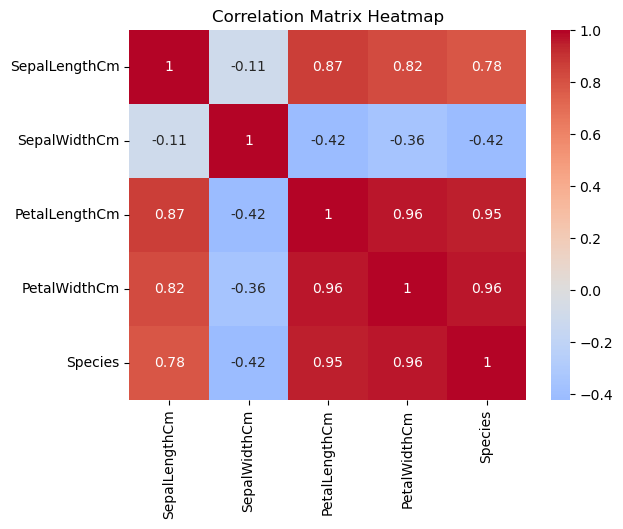

In [19]:
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Violin Plot

C:\Users\Jaydeep\AppData\Local\Temp\ipykernel_14756\1269941407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette='husl')


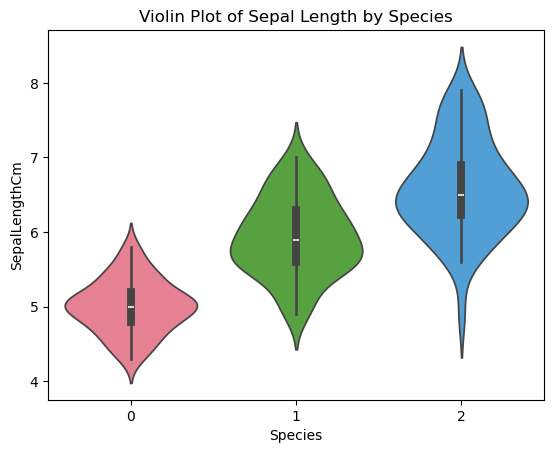

In [21]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette='husl')
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

In [23]:
# Interactive Plot with Plotly

In [24]:
import plotly.express as px

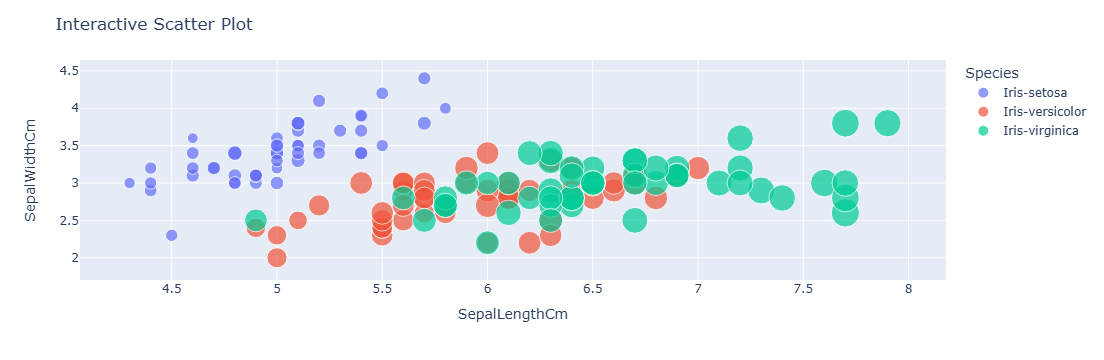

In [61]:
fig = px.scatter(df, x='SepalLengthCm', y='SepalWidthCm', color='Species', size='PetalLengthCm', hover_data=['PetalWidthCm'])
fig.update_layout(title='Interactive Scatter Plot')
fig.show()

# Data Preparation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
X = df.drop(columns=['Species'])
y = df['Species']

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_rf = rf.predict(X_test)

In [39]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [58]:
print("Random Forest Metrics:")
print(f"Accuracy Score: {accuracy_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")
print()

Random Forest Metrics:
Accuracy Score: 1.0000
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000



#  Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
y_pred_gb = gb.predict(X_test)

In [43]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [59]:
print("Gradient Boosting Metrics:")
print(f"Accuracy Score: {accuracy_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")
print()

Gradient Boosting Metrics:
Accuracy Score: 1.0000
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000



# Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred_svm = svm.predict(X_test)

In [47]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [60]:
print("Support Vector Machine (SVM) Metrics:")
print(f"Accuracy Score: {accuracy_svm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svm:.4f}")
print(f"Mean Squared Error (MSE): {mse_svm:.4f}")
print(f"R² Score: {r2_svm:.4f}")

Support Vector Machine (SVM) Metrics:
Accuracy Score: 1.0000
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000


In [54]:
from sklearn.metrics import confusion_matrix


In [55]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

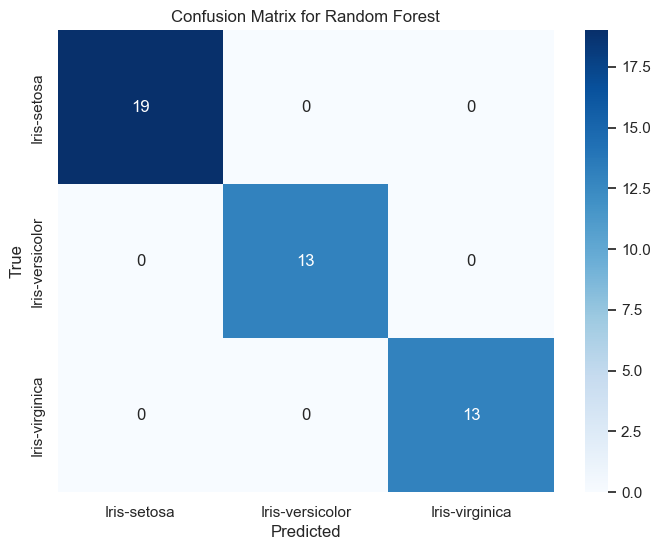

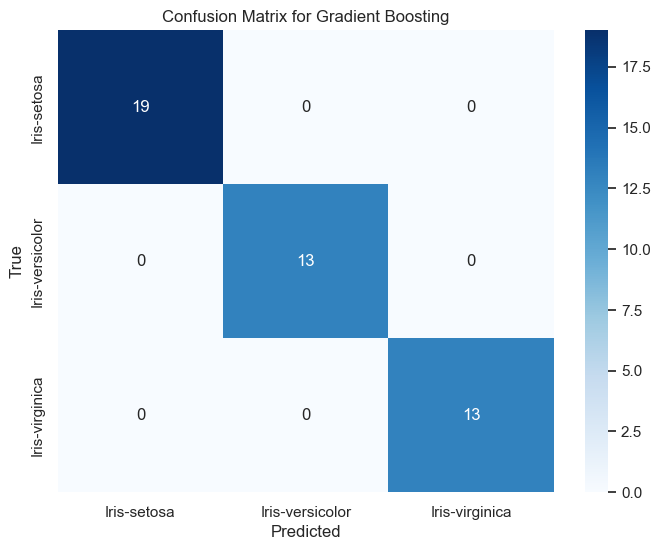

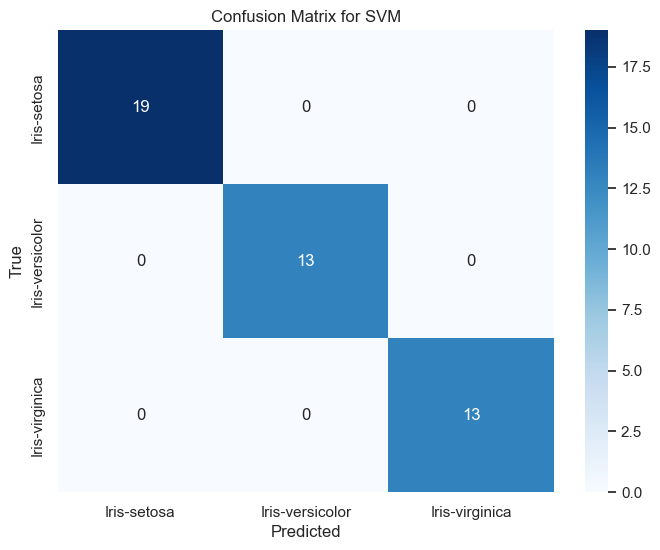

In [56]:
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')